# Synthesis

This is an example of how to use the Synthesis tool.

We perform synthesis on the Air Quality dataset.

In [1]:
import os
from pathlib import Path

In [2]:
SYNTHEFY_PACKAGE_BASE = Path(os.getenv("SYNTHEFY_PACKAGE_BASE"))
SYNTHEFY_PACKAGE_BASE

PosixPath('/home/ubuntu/code/synthefy-package')

In [3]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from synthefy_pkg.experiments.synthesis_experiment import SynthesisExperiment
from synthefy_pkg.preprocessing.preprocess import DataPreprocessor
from synthefy_pkg.data.synthefy_dataset import SynthefyDataset
from synthefy_pkg.postprocessing.postprocess import Postprocessor

2024-11-10 18:38:00.342 | WARNING  | synthefy_pkg.utils.expiry:check_codebase_expired:26 - This codebase will expire on Jan 1, 2025 UTC. Current time is 2024-11-10 18:38:00.327315+00:00.


## Preprocess the data

Load the preprocessing config

In [4]:
preprocess_config_filepath = Path("examples/configs/preprocessing_configs/config_air_quality_preprocessing.json")
assert os.path.exists(preprocess_config_filepath)

Run Preprocessing

In [5]:
preprocessor = DataPreprocessor(config_path=preprocess_config_filepath)
preprocessor.process_data()

dataset = SynthefyDataset(config_path=preprocess_config_filepath)
dataset.load_windows(window_types=["timeseries"])

2024-11-10 18:38:00.368 | WARNING  | synthefy_pkg.preprocessing.base_config:__post_init__:129 - Using DEFAULT output path: /home/ubuntu/data/air_quality_synthefy
2024-11-10 18:38:00.370 | INFO     | synthefy_pkg.preprocessing.preprocess:validate_timestamps_config:593 - Validating timestamps config
2024-11-10 18:38:00.372 | WARNING  | synthefy_pkg.preprocessing.preprocess:validate_timestamps_config:616 - Scaler not specified for `timestamps_feature_M` of `timestamps_features`, using default minmax scaler
2024-11-10 18:38:00.374 | WARNING  | synthefy_pkg.preprocessing.preprocess:validate_timestamps_config:616 - Scaler not specified for `timestamps_feature_Y` of `timestamps_features`, using default minmax scaler
2024-11-10 18:38:00.374 | WARNING  | synthefy_pkg.preprocessing.preprocess:validate_timestamps_config:616 - Scaler not specified for `timestamps_feature_D` of `timestamps_features`, using default minmax scaler
2024-11-10 18:38:00.375 | INFO     | synthefy_pkg.preprocessing.preproc

## Train the model

Load the training config

In [6]:
training_config_filepath = Path("examples/configs/synthesis_configs/config_air_quality_synthesis.yaml")
assert os.path.exists(training_config_filepath)

Optional: Examine the config

In [7]:
if 0:
    with open(training_config_filepath, 'r') as f:
        training_config = f.read()
    
    print(training_config)

Setup Experiment

In [8]:
experiment = SynthesisExperiment(training_config_filepath)

2024-11-10 18:38:10.266 | WARNING  | synthefy_pkg.configs.dataset_configs:validate_config:72 - NUM TIMESTAMPS LABELS: 0
/home/ubuntu/code/synthefy-package/synthefy_dev/lib/python3.10/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Train Model

In [9]:
experiment.train()

2024-11-10 18:38:10.793 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:263 - Loading train dataset
2024-11-10 18:38:10.795 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:48 - The dataset location is : /home/ubuntu/data/air_quality_synthefy/train_timeseries.npy
2024-11-10 18:38:10.796 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:51 - The discrete labels location is : /home/ubuntu/data/air_quality_synthefy/train_discrete_conditions.npy
2024-11-10 18:38:10.798 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:57 - The continuous labels location is : /home/ubuntu/data/air_quality_synthefy/train_continuous_conditions.npy
2024-11-10 18:38:10.815 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:265 - Loading val dataset
2024-11-10 18:38:10.817 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:48 - The dataset location is : /home/ubuntu/data/air_quality_synthefy/val_timeseries.npy
2024-11-10 18:38:10.817 | INFO

Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

/home/ubuntu/code/synthefy-package/synthefy_dev/lib/python3.10/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:382: `ModelCheckpoint(monitor='val_loss')` could not find the monitored key in the returned metrics: ['train_loss', 'train_loss_step', 'train_loss_epoch', 'epoch', 'step']. HINT: Did you call `log('val_loss', value)` in the `LightningModule`?


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_epochs=30` reached.


## Examine the checkpoint

In [10]:
SYNTHEFY_DATASETS_BASE = Path(os.getenv("SYNTHEFY_DATASETS_BASE"))
checkpoint_path = SYNTHEFY_DATASETS_BASE / "training_logs/air_quality_synthefy/Time_Series_Diffusion_Training/synthesis_air_quality_synthefy/checkpoints/best_model.ckpt"
assert os.path.exists(checkpoint_path)

In [11]:
model = torch.load(checkpoint_path)
print(f"epoch: {model['epoch']}, global_step: {model['global_step']}")
del model

epoch: 29, global_step: 2640


## Generate Synthetic Data

In [12]:
experiment.generate_synthetic_data(model_checkpoint_path=checkpoint_path)
postprocessor = Postprocessor(config_filepath=training_config_filepath)
postprocessor.postprocess()

2024-11-10 19:00:55.947 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:263 - Loading train dataset
2024-11-10 19:00:55.949 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:48 - The dataset location is : /home/ubuntu/data/air_quality_synthefy/train_timeseries.npy
2024-11-10 19:00:55.949 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:51 - The discrete labels location is : /home/ubuntu/data/air_quality_synthefy/train_discrete_conditions.npy
2024-11-10 19:00:55.951 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:57 - The continuous labels location is : /home/ubuntu/data/air_quality_synthefy/train_continuous_conditions.npy
2024-11-10 19:00:55.970 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:265 - Loading val dataset
2024-11-10 19:00:55.972 | INFO     | synthefy_pkg.data.general_pl_dataloader:__init__:48 - The dataset location is : /home/ubuntu/data/air_quality_synthefy/val_timeseries.npy
2024-11-10 19:00:55.973 | INFO

The synthetic dataset already exists. Skipping generation. `/home/ubuntu/data/synthefy/runs/generation_logs/air_quality_synthefy/Time_Series_Diffusion_Training/synthesis_air_quality_synthefy/test_dataset`
The synthetic dataset already exists. Skipping generation. `/home/ubuntu/data/synthefy/runs/generation_logs/air_quality_synthefy/Time_Series_Diffusion_Training/synthesis_air_quality_synthefy/val_dataset`
The synthetic dataset already exists. Skipping generation. `/home/ubuntu/data/synthefy/runs/generation_logs/air_quality_synthefy/Time_Series_Diffusion_Training/synthesis_air_quality_synthefy/train_dataset`


2024-11-10 19:01:00.600 | INFO     | synthefy_pkg.postprocessing.postprocess:_get_eval_metrics_by_dataset_type:80 - Processing train data ...
2024-11-10 19:01:00.812 | INFO     | synthefy_pkg.postprocessing.postprocess:_get_eval_metrics_by_dataset_type:80 - Processing val data ...
2024-11-10 19:01:00.928 | INFO     | synthefy_pkg.postprocessing.postprocess:_get_eval_metrics_by_dataset_type:80 - Processing test data ...
2024-11-10 19:01:01.052 | INFO     | synthefy_pkg.postprocessing.postprocess:_save_results:618 - Results saved to: /home/ubuntu/data/synthefy/runs/generation_logs/air_quality_synthefy/Time_Series_Diffusion_Training/synthesis_air_quality_synthefy/plots/
2024-11-10 19:01:01.053 | INFO     | synthefy_pkg.postprocessing.postprocess:_log_summary:624 - All Data Metrics for RMSE for time series PM2.5:
2024-11-10 19:01:01.054 | INFO     | synthefy_pkg.postprocessing.postprocess:_log_summary:626 - TRAIN: 10.424457550048828
2024-11-10 19:01:01.055 | INFO     | synthefy_pkg.postpro

## Examine Synthetic Data

### Plots

In [13]:
SYNTHEFY_DATASETS_BASE = Path(os.getenv("SYNTHEFY_DATASETS_BASE"))
SYNTHETIC_DATA_PATH = SYNTHEFY_DATASETS_BASE / "generation_logs/air_quality_synthefy/Time_Series_Diffusion_Training/synthesis_air_quality_synthefy/plots"
assert os.path.exists(SYNTHETIC_DATA_PATH)

In [14]:
os.listdir(SYNTHETIC_DATA_PATH)

['line_O3_Worst_MAE_val.png',
 'line_SO2_Worst_MAPE_train.png',
 'hist_metric_plot_NO2_MAPE_val.png',
 'hist_metric_plot_PM10_MAE_test.png',
 'hist_metric_plot_CO_MSE_test.png',
 'hist_metric_plot_SO2_MAPE_val.png',
 'hist_fourier_all_data_PM2.5_test.png',
 'hist_metric_plot_SO2_MSE_train.png',
 'line_SO2_Best_MSE_test.png',
 'line_PM2.5_Best_MAE_val.png',
 'line_SO2_Best_MAPE_test.png',
 'hist_metric_plot_NO2_MAPE_test.png',
 'line_SO2_Best_RMSE_val.png',
 'line_PM2.5_Best_MSE_test.png',
 'line_O3_Worst_MDAPE_test.png',
 'line_CO_Worst_SMAPE_train.png',
 'line_CO_Worst_MSE_train.png',
 'hist_metric_plot_PM2.5_MSE_train.png',
 'line_SO2_Worst_MAE_val.png',
 'hist_metric_plot_SO2_RMSE_train.png',
 'hist_all_data_PM2.5_val.png',
 'line_NO2_Worst_RMSE_val.png',
 'hist_all_data_NO2_val.png',
 'line_PM2.5_Worst_SMAPE_train.png',
 'line_SO2_Best_MDAPE_val.png',
 'hist_all_data_PM10_val.png',
 'line_NO2_Best_MDAPE_test.png',
 'line_PM10_Best_RMSE_train.png',
 'hist_metric_plot_CO_MSE_train.pn

In [15]:
def plot_fn(subset):
    # List all files in the directory
    files = os.listdir(SYNTHETIC_DATA_PATH)
    files = [f for f in files if subset in f]
    
    # Filter out image files (e.g., PNG, JPG)
    image_files = [f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Display the images in a single panel
    num_images = len(image_files)
    cols = 3  # Number of columns you want in the panel
    rows = (num_images // cols) + (num_images % cols > 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    
    # Flatten axes array if more than one row
    axes = axes.flatten() if rows > 1 else [axes]
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(SYNTHETIC_DATA_PATH, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_file)
    
    # Hide any unused subplots
    for i in range(num_images, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

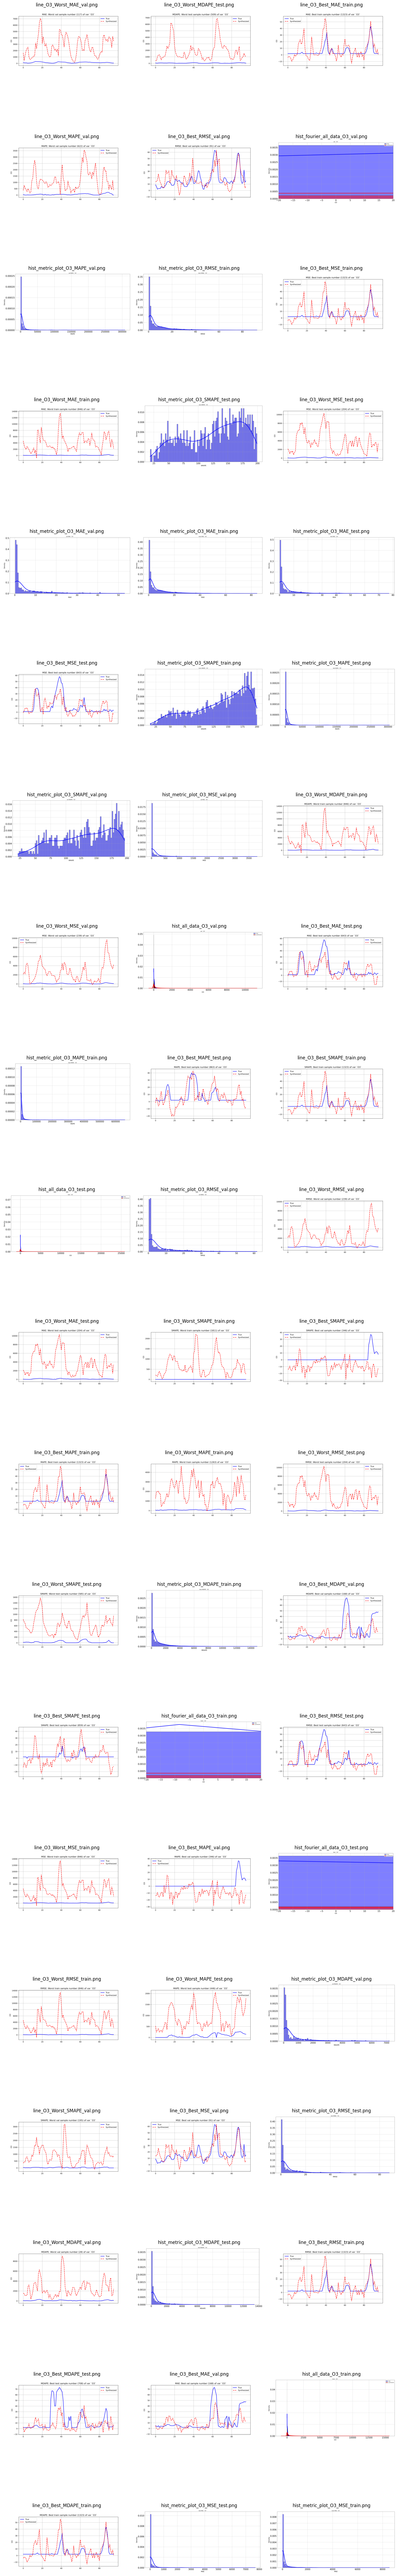

In [16]:
series = [
    "O3",
    "SO2",
    "PM10",
    "NO2",
    "PM2.5",
    "CO",
]

plot_fn(series[0])

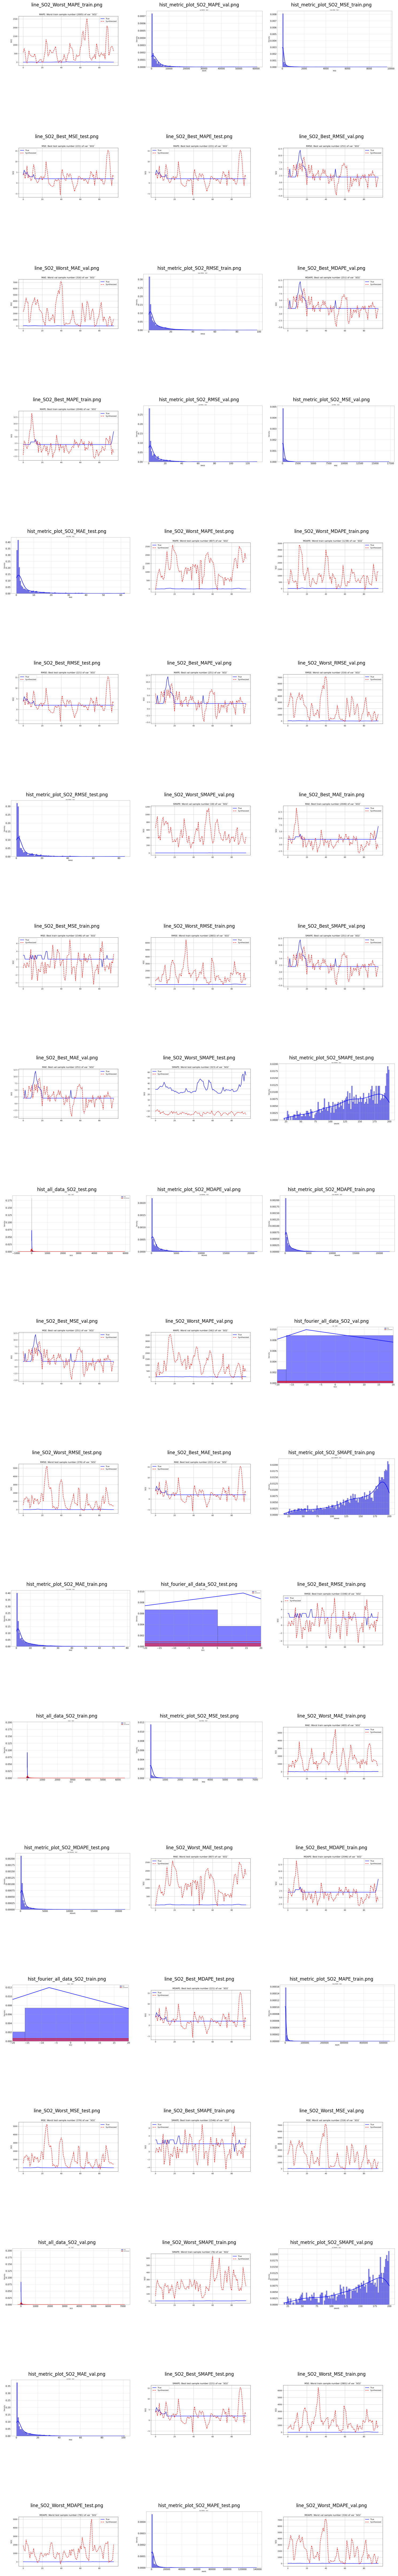

In [17]:
plot_fn(series[1])

### Unscaled Data

In [18]:
SYNTHETIC_DATA_PATH_UNSCALED = SYNTHEFY_DATASETS_BASE / "generation_logs/air_quality_synthefy/Time_Series_Diffusion_Training/synthesis_air_quality_synthefy/unscaled_data"
assert os.path.exists(SYNTHETIC_DATA_PATH_UNSCALED)

In [19]:
unscaled_data_files = os.listdir(SYNTHETIC_DATA_PATH_UNSCALED)

In [20]:
for file in unscaled_data_files:
    # print(file)
    data = np.load(SYNTHETIC_DATA_PATH_UNSCALED / file, allow_pickle=True)
    print(f"{file}: {data.shape}")

val_real_timeseries_unscaled.pkl.npy: (701, 6, 96)
test_continuous_conditions_unscaled.pkl.npy: (876, 96, 8)
val_synthesized_timeseries_unscaled.pkl.npy: (701, 6, 96)
test_synthesized_timeseries_unscaled.pkl.npy: (876, 6, 96)
train_synthesized_timeseries_unscaled.pkl.npy: (2803, 6, 96)
train_real_timeseries_unscaled.pkl.npy: (2803, 6, 96)
test_real_timeseries_unscaled.pkl.npy: (876, 6, 96)
val_discrete_conditions_unscaled.pkl.npy: (701, 96, 2)
train_discrete_conditions_unscaled.pkl.npy: (2803, 96, 2)
test_discrete_conditions_unscaled.pkl.npy: (876, 96, 2)
val_continuous_conditions_unscaled.pkl.npy: (701, 96, 8)
train_continuous_conditions_unscaled.pkl.npy: (2803, 96, 8)
